Prime objective of this Kernel is to play with movie data and try to understand and explore the data.

In [1]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
#plotly.tools.set_credentials_file(username='rounakbanik', api_key='xTLaHBy9MVv5szF4Pwan')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [2]:
df=pd.read_csv("movies_metadata.csv")

In [3]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [4]:
df.shape

(45466, 24)

So we have 45K movies here and 24 different features which gives us various information about a specific movie. Let's understand
each feature and try to make sense of the data given.

Features

adult: Indicates if the movie is X-Rated or Adult.

belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to.

budget: The budget of the movie in dollars.

genres: A stringified list of dictionaries that list out all the genres associated with the movie.

homepage: The Official Homepage of the move.

id: The ID of the move.

imdb_id: The IMDB ID of the movie.

original_language: The language in which the movie was originally shot in.

original_title: The original title of the movie.


overview: A brief blurb of the movie.

popularity: The Popularity Score assigned by TMDB.

poster_path: The URL of the poster image.

production_companies: A stringified list of production companies involved with the making of the movie.

production_countries: A stringified list of countries where the movie was shot/produced in.

release_date: Theatrical Release Date of the movie.

revenue: The total revenue of the movie in dollars.

runtime: The runtime of the movie in minutes.

spoken_languages: A stringified list of spoken languages in the film.

status: The status of the movie (Released, To Be Released, Announced, etc.)

tagline: The tagline of the movie.

title: The Official Title of the movie.

video: Indicates if there is a video present of the movie with TMDB.

vote_average: The average rating of the movie.

vote_count: The number of votes by users, as counted by TMDB.

# FEATURE -->ADULT

In [5]:
df['adult'].unique()

array(['False', 'True', ' - Written by Ørnås',
       ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
       ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'],
      dtype=object)

In [6]:
df['adult'].nunique()

5

I can understand 'False' and 'True' which signifies that if the movie is Adult or not.But what about remaining 3. Let's check it out

In [7]:
df[df['adult']==' - Written by Ørnås']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df[df['adult']==' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This doesn't seem right, may be some error in the entry .'Let's find the index and drop the rows.

In [9]:
df[df['adult']==' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:

df=df.drop([19730,29503,35587])

In [11]:
df['adult'].unique()

array(['False', 'True'], dtype=object)

In [12]:
df['adult'].value_counts()

False    45454
True         9
Name: adult, dtype: int64

Almost all the movies(except 9) are not adult rated and can be enjoyed by everyone. Let's check this 9 movies.

In [13]:
df[df['adult']=='True']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19489,True,NaN,0,"[{'id': 27, 'name': 'Horror'}]",NaN,5422,tt0079642,it,Le notti erotiche dei morti viventi,A sailor takes an American businessman and his...,...,1980-11-18,0.0,112.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,Erotic Nights of the Living Dead,False,2.2,7.0
28701,True,NaN,0,"[{'id': 80, 'name': 'Crime'}]",http://www.imdb.com/title/tt0119931/,169158,tt0119931,en,Standoff,The FBI and Texas police make ready to storm t...,...,1998-01-11,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Trust Will Get You Killed,Standoff,False,4.8,5.0
31934,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,44781,tt0322232,cn,發電悄嬌娃,Electrical Girl centers around a horny young w...,...,2001-04-26,0.0,89.0,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}]",Released,NaN,Electrical Girl,False,0.0,0.0
32113,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.dietofsex.com/,324230,tt3094816,es,Diet of Sex,Ágata suffers from a psychological disorder wh...,...,2014-02-14,0.0,72.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,"Comedy, food, drama and sex, a lot of sex",Diet of Sex,False,4.0,12.0
39901,True,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 27, 'name...",NaN,35731,tt1161951,en,Amateur Porn Star Killer 2,Shane Ryan's sequel to the disturbing Amateur ...,...,2008-05-13,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Humiliation. Rape. Murder. You know the drill.,Amateur Porn Star Killer 2,False,6.3,8.0
39902,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,55774,tt1153101,en,The Band,Australian film about a fictional sub-par Aust...,...,2009-11-17,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Sex, drugs and Rock 'n Roll",The Band,False,3.3,7.0
40574,True,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 27, 'name...",NaN,39922,tt0070696,da,Dværgen,Olaf and his mother run a boarding house and a...,...,1973-12-20,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Mother of all Dwarfsploitation films!,The Sinful Dwarf,False,5.8,13.0
41009,True,NaN,750000,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",NaN,376004,tt4044464,en,Adulterers,A man who returns home to find his wife cheati...,...,2016-01-05,0.0,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Love. Betrayal. Vengeance,Adulterers,False,5.2,16.0
43090,True,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,448290,tt2697688,en,Half -Life,An American scientific research facility opens...,...,NaN,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",In Production,NaN,Half -Life,False,3.7,3.0


This data is absurd, as you can see the budget is coming out zero, revenue generated is zero. So I think this might be some 
incomplete data. 

Further we can drop this column adult as almost all the moves are of the same type(i:e Non-adult)so it will  not give us any insight of the dataset.

In [14]:
df=df.drop(['adult'],axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45463 entries, 0 to 45465
Data columns (total 23 columns):
belongs_to_collection    4491 non-null object
budget                   45463 non-null object
genres                   45463 non-null object
homepage                 7779 non-null object
id                       45463 non-null object
imdb_id                  45446 non-null object
original_language        45452 non-null object
original_title           45463 non-null object
overview                 44509 non-null object
popularity               45460 non-null object
poster_path              45077 non-null object
production_companies     45460 non-null object
production_countries     45460 non-null object
release_date             45376 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null object
tagline                  20412 non-null objec

# budget: The budget of the movie in dollars.

In [16]:
df['budget']=df['budget'].astype(int)

In [17]:
df['budget'].describe()

count    4.546300e+04
mean     4.224579e+06
std      1.742413e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

In [18]:
df[df['budget']==0].shape

(36573, 23)

So we have around 36K movies for which the budget is 0. That means it might have either not been disclosed or not captured.

In [19]:
df['budget']=df['budget'].replace(0,np.nan)

In [20]:
df['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [21]:
df[df['budget'].notnull()].shape

(8890, 23)

So there are around 9K movies, for which we know budget, we will work on it. So the mean of budget is 2.16M and the highest money spent is 3.8B . 

I have a couple of questions here:

1)What is the name of the movie on which we spent max and min.

2)What is the pattern of change in the budget of movies over time. We will use release_date to analyze the change over time.


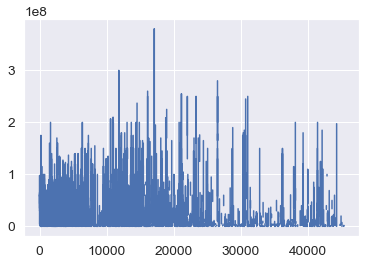

In [22]:
plt.plot(df['budget'])

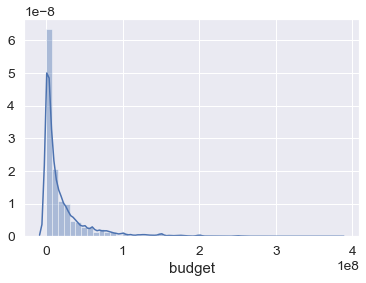

In [23]:
sns.distplot(df[df['budget'].notnull()]['budget'])

In [24]:
df_bud=df.sort_values(by='budget',ascending=False)
df_bud[['budget','original_title']].head(10)


,budget,original_title
17124,380000000.0,Pirates of the Caribbean: On Stranger Tides
11827,300000000.0,Pirates of the Caribbean: At World's End
26558,280000000.0,Avengers: Age of Ultron
11067,270000000.0,Superman Returns
44842,260000000.0,Transformers: The Last Knight
16130,260000000.0,Tangled
18685,260000000.0,John Carter
11780,258000000.0,Spider-Man 3
21175,255000000.0,The Lone Ranger
22059,250000000.0,The Hobbit: The Desolation of Smaug


In [25]:
df_bud1=df.sort_values(by='budget',ascending=True)
df_bud1[['budget','original_title']].head(10)

,budget,original_title
31435,1.0,Victoria Day
21319,1.0,Fetching Cody
27958,1.0,Fear Clinic
2483,1.0,Lost & Found
25093,1.0,Apflickorna
19258,1.0,"Love, Wedding, Marriage"
3342,1.0,Modern Times
43573,1.0,Bad Girl
16608,1.0,Speed & Angels
35579,1.0,Supilinna salaselts


So we got the movies on which highest amount of money was spent to make the movie. However when we are checking lowest amount, it 
is around 1$ which doesnt make sense much, we will dive in details and check later.

Lets check budget over the year, for that we have to take out the year from release date.

In [26]:
df['release_date']=pd.to_datetime(df['release_date'])

In [27]:
df['release_year']=df['release_date'].apply(lambda x:str(x).split('-')[0] if x!=np.nan else np.nan)

In [28]:
df['day_of_week'] = df.release_date.dt.weekday_name

In [29]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [30]:
df['month'] = df['release_date'].apply(get_month)

In [31]:
df['budget'].shape,df['release_year'].shape

((45463,), (45463,))

In [32]:
df[df['budget'].notnull()].shape,df[df['release_year'].notnull()].shape

((8890, 26), (45463, 26))

In [33]:
df['release_year'].unique()

array(['1995', '1996', '1994', '1997', '1976', '1992', '1967', '1993',
       '1964', '1977', '1965', '1982', '1985', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1974', '1970', '1960', '1955',
       '1959', '1968', '1980', '1988', '1975', '2002', 'NaT', '1948',
       '1943', '1950', '1987', '1973', '1956', '1958', '1949', '1972',
       '1953', '1998', '1933', '2010', '1952', '1951', '1957', '1961',
       '1954', '1934', '1944', '1963', '1942', '1941', '1939', '1947',
       '1946', '1945', '1938', '1935', '1936', '1926', '1932', '1979',
       '1971', '1986', '2013', '1978', '1966', '1962', '1983', '1984',
       '1931', '1922', '1999', '1927', '1929', '1930', '1928', '2012',
       '1925', '2000', '1919', '1923', '1920', '1918', '1921', '2001',
       '2011', '1924', '2003', '2004', '1915', '1916', '1917', '2005',
       '2006', '1902', '1903', '2007', '2008', '2009', '1914', '1912',
       '1913', '1898', '1899', '1894', '1909', '1910', '1901', '1893',
       

In [34]:
df['release_year']=df['release_year'].replace('NaT',0)

In [35]:
df['release_year']=df['release_year'].astype(int)

In [36]:
df['release_year']=df['release_year'].replace(0,np.nan)

In [37]:
df['release_year'].isnull().sum()

87

In [38]:
df[df['budget'].notnull()].shape,df[df['release_year'].notnull()].shape

((8890, 26), (45376, 26))

In [39]:
df[df['budget'].notnull()][['release_year','budget']]

,release_year,budget
0,1995.0,30000000.0
1,1995.0,65000000.0
3,1995.0,16000000.0
5,1995.0,60000000.0
6,1995.0,58000000.0
...,...,...
45402,2014.0,2000000.0
45408,2004.0,2000000.0
45409,2006.0,800000.0
45412,2010.0,2000000.0


In [40]:
budget_per_year=df[df['budget'].notnull()].groupby('release_year')['budget'].mean()
budget_per_year.index

Float64Index([1902.0, 1903.0, 1904.0, 1905.0, 1914.0, 1915.0, 1916.0, 1918.0,
              1919.0, 1920.0,
              ...
              2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0,
              2017.0, 2018.0],
             dtype='float64', name='release_year', length=108)

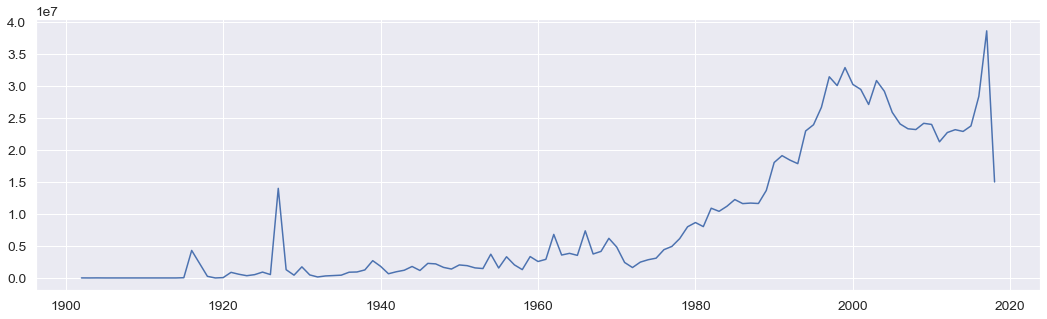

In [41]:
plt.figure(figsize=(18,5))
plt.plot(budget_per_year.index,budget_per_year)

So from the the release year and the budget we can observe that budget increased over time , Initially it was low around 1M , the 
budget started to increase exponentially from around 1975.

# revenue: The total revenue of the movie in dollars.

Now let's check the revenue earned from the movies.We will introduce a new feature called return which will give us the profit
earned.

return=Revenue/budget

In [42]:
df['revenue'].describe()

count    4.546000e+04
mean     1.120935e+07
std      6.433225e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

In [43]:
df[df['revenue']==0].shape

(38052, 26)

So we have around 38K movies for which the revenue is 0. That means it might have either not been disclosed or not captured.

In [44]:
df['revenue']=df['revenue'].replace(0,np.nan)

In [45]:
df['revenue'].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

In [46]:
df['return']=df['revenue']/df['budget']

In [47]:
df[df['revenue'].notnull()].shape

(7408, 27)

So there are 7400 movies for which revenue is available. Let check the movies for which highest revenue is generated and most 
importantly lets check the return that the movie maker got

In [48]:
revenue_sort=df.sort_values(by='revenue',ascending=False)
revenue_sort[['revenue','budget','return','original_title','release_year']].head(10)

,revenue,budget,return,original_title,release_year
14551,2.787965e+09,237000000.0,11.763566,Avatar,2009.0
26555,2.068224e+09,245000000.0,8.441729,Star Wars: The Force Awakens,2015.0
1639,1.845034e+09,200000000.0,9.225171,Titanic,1997.0
17818,1.519558e+09,220000000.0,6.907081,The Avengers,2012.0
25084,1.513529e+09,150000000.0,10.090192,Jurassic World,2015.0
28830,1.506249e+09,190000000.0,7.927628,Furious 7,2015.0
26558,1.405404e+09,280000000.0,5.019299,Avengers: Age of Ultron,2015.0
17437,1.342000e+09,125000000.0,10.736000,Harry Potter and the Deathly Hallows: Part 2,2011.0
22110,1.274219e+09,150000000.0,8.494793,Frozen,2013.0
42222,1.262886e+09,160000000.0,7.893040,Beauty and the Beast,2017.0


So from above we can see Avatar Star Wars  and Titanic are the most revenue generating movies.Howerver high revenue doesn't 
mean high profit. For that we have to check the returns.

In [49]:
df[(df['return'].notnull()) & (df['budget']>5e6)][['revenue','budget','return','original_title','release_year']].sort_values(by='return',ascending=False)

,revenue,budget,return,original_title,release_year
1065,792965326.0,10500000.0,7.552051e+01,E.T. the Extra-Terrestrial,1982.0
256,775398007.0,11000000.0,7.049073e+01,Star Wars,1977.0
1338,470654000.0,7000000.0,6.723629e+01,Jaws,1975.0
1888,441306145.0,8000000.0,5.516327e+01,The Exorcist,1973.0
352,254700832.0,6000000.0,4.245014e+01,Four Weddings and a Funeral,1994.0
...,...,...,...,...,...
6736,23.0,12000000.0,1.916667e-06,In the Cut,2003.0
17527,18.0,10000000.0,1.800000e-06,Deadfall,1993.0
2663,6.0,6400000.0,9.375000e-07,Never Talk to Strangers,1995.0
8107,12.0,16000000.0,7.500000e-07,The Cookout,2004.0


Thus highest return earned is by movie E.T. the Extra-Terrestrial and Star Wars, both are sci-fi movies.

In [50]:
Revenue_per_year=df[df['revenue'].notnull()].groupby(df['release_year'])['revenue'].mean()

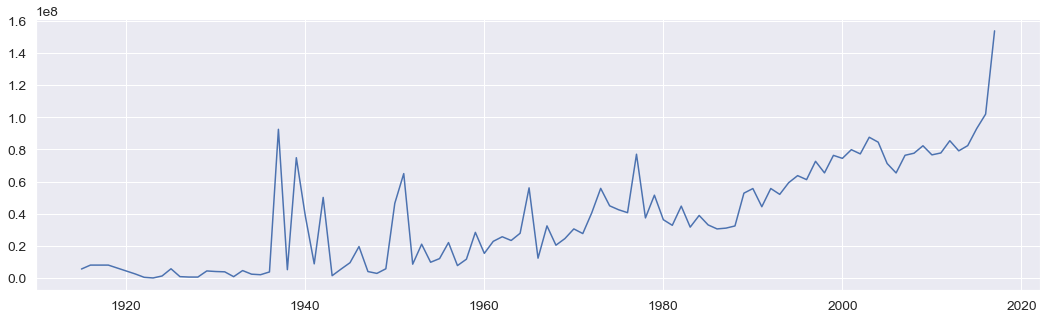

In [51]:
plt.figure(figsize=(18,5))
plt.plot(Revenue_per_year.index, Revenue_per_year)

As evident from the plot as the time passed , box office collection also increased with time.

# belongs_to_collection:

In [52]:
df[df['belongs_to_collection'].notnull()].shape

(4491, 27)

So out of 45k movies only 4491 movies had sequel. Let check out the sequol and why the sequel were made, was it 
profitable(it should be else no one will invest in sequel), Over what time span the sequel were made..For example Harry Potter 
was made over a span of 10 years. We can check that here.

In [53]:
df_fran=df[df['belongs_to_collection'].notnull()]

In [54]:
df_fran['belongs_to_collection']

0        {'id': 10194, 'name': 'Toy Story Collection', ...
2        {'id': 119050, 'name': 'Grumpy Old Men Collect...
4        {'id': 96871, 'name': 'Father of the Bride Col...
9        {'id': 645, 'name': 'James Bond Collection', '...
12       {'id': 117693, 'name': 'Balto Collection', 'po...
                               ...                        
45355    {'id': 37261, 'name': 'The Carry On Collection...
45358    {'id': 37261, 'name': 'The Carry On Collection...
45369    {'id': 37261, 'name': 'The Carry On Collection...
45371    {'id': 477208, 'name': 'DC Super Hero Girls Co...
45382    {'id': 200641, 'name': 'Red Lotus Collection',...
Name: belongs_to_collection, Length: 4491, dtype: object

In [55]:
#df_fran['belongs_to_collection']=df_fran['belongs_to_collection'].apply(lambda x: x['name'] if isinstance(x,dict) else np.nan)

In [56]:
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)

In [57]:
df_fran[(df_fran['return'].notnull()) & (df_fran['budget']>5e6)][['revenue','budget','return','original_title','belongs_to_collection']].sort_values(by='return',ascending=False)

,revenue,budget,return,original_title,belongs_to_collection
256,775398007.0,11000000.0,70.490728,Star Wars,Star Wars Collection
1338,470654000.0,7000000.0,67.236286,Jaws,The Jaws Collection
1888,441306145.0,8000000.0,55.163268,The Exorcist,The Exorcist Collection
834,245066411.0,6000000.0,40.844402,The Godfather,The Godfather Collection
4492,296000000.0,7500000.0,39.466667,Look Who's Talking,Look Who's Talking Collection
...,...,...,...,...,...
15684,967000.0,30000000.0,0.032233,TEKKEN,Tekken Collection
7155,238227.0,12500000.0,0.019058,King Solomon's Mines,Allan Quatermain Collection
10095,251495.0,30000000.0,0.008383,Dominion: Prequel to the Exorcist,The Exorcist Collection
3157,30471.0,6000000.0,0.005078,The Boondock Saints,The Boondock Saints Collection


In [58]:
df_fran[df_fran['belongs_to_collection']=='Star Wars Collection'].shape[0]

8

Thus highest return is earned by Star Wars which belongs to stars wars francise which contains 8 movies under its banner.

In [59]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()


In [60]:
fran_pivot.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


The highest revenue is collected by Harry Potter Franchise having 8 movies under its banner and has earned a revenue of 7.07 billion dollar
The Star Wars Movies come in a close second with a 7.403 billion dollars from 8 movies too. James Bond is third but the franchise
has significantly more movies compared to the others in the list and therefore, a much smaller average gross.

Most Successful Movie Franchises (by Average Gross)

We will use the average gross per movie to gauge the success of a movie franchise. However, this is not a very potent metric 
as the revenues in this dataset have not been adjusted for inflation. Therefore, revenue statistics will tend to strongly favor
franchises in the recent times.

In [61]:
fran_pivot.sort_values('mean',ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


The Avatar Collection, although just consisting of one movie at the moment, is the most successful franchise of all time
with the sole movie raking in close to 3 billion dollars. The Harry Potter franchise is still the most successful franchise 
with at least 5 movies.

# genres

In [62]:
df['genres']

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45461    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
45462                        [{'id': 18, 'name': 'Drama'}]
45463    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45464                                                   []
45465                                                   []
Name: genres, Length: 45463, dtype: object

In [63]:
df_gen=df[df['genres'].notnull()]

In [64]:
df_gen.shape

(45463, 27)

In [65]:
df_gen['genres']=df_gen['genres'].apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

In [66]:
#df['genres']=df_gen['genres']

In [67]:
df_gen['genres']

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genres, Length: 45463, dtype: object

Let's see which genre movie has earned most.

In [68]:
df_gen[(df_gen['budget']>1e6)][['revenue','budget','return','original_title','genres']].sort_values(by='revenue',ascending=False)

,revenue,budget,return,original_title,genres
14551,2.787965e+09,237000000.0,11.763566,Avatar,"[Action, Adventure, Fantasy, Science Fiction]"
26555,2.068224e+09,245000000.0,8.441729,Star Wars: The Force Awakens,"[Action, Adventure, Science Fiction, Fantasy]"
1639,1.845034e+09,200000000.0,9.225171,Titanic,"[Drama, Romance, Thriller]"
17818,1.519558e+09,220000000.0,6.907081,The Avengers,"[Science Fiction, Action, Adventure]"
25084,1.513529e+09,150000000.0,10.090192,Jurassic World,"[Action, Adventure, Science Fiction, Thriller]"
...,...,...,...,...,...
45352,NaN,7500000.0,NaN,House of the Long Shadows,"[Horror, Comedy, Mystery]"
45395,NaN,1200000.0,NaN,Мертвые дочери,"[Drama, Horror]"
45398,NaN,1254040.0,NaN,Lauri Mäntyvaaran tuuheet ripset,"[Romance, Comedy]"
45402,NaN,2000000.0,NaN,Корпоратив,[Comedy]


Highest revenue generated are by sci-fi movies.

In [69]:
df_gen['genres']

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genres, Length: 45463, dtype: object

In [70]:
s = df_gen.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [71]:
gen_df = df_gen.drop('genres', axis=1).join(s)

In [72]:
gen_df['genre'].value_counts().shape[0]

20

In [73]:
gen_df['genre'].value_counts()

Drama              20265
Comedy             13182
Thriller            7624
Romance             6735
Action              6596
Horror              4673
Crime               4307
Documentary         3932
Adventure           3496
Science Fiction     3049
Family              2770
Mystery             2467
Fantasy             2313
Animation           1935
Foreign             1622
Music               1598
History             1398
War                 1323
Western             1042
TV Movie             767
Name: genre, dtype: int64

In [74]:
gen=pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
gen.columns=['Genre','Movie_count']
gen.head(10)

,Genre,Movie_count
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


So the Genre to which maximum movie belongs is Drama. Let try plotting the 

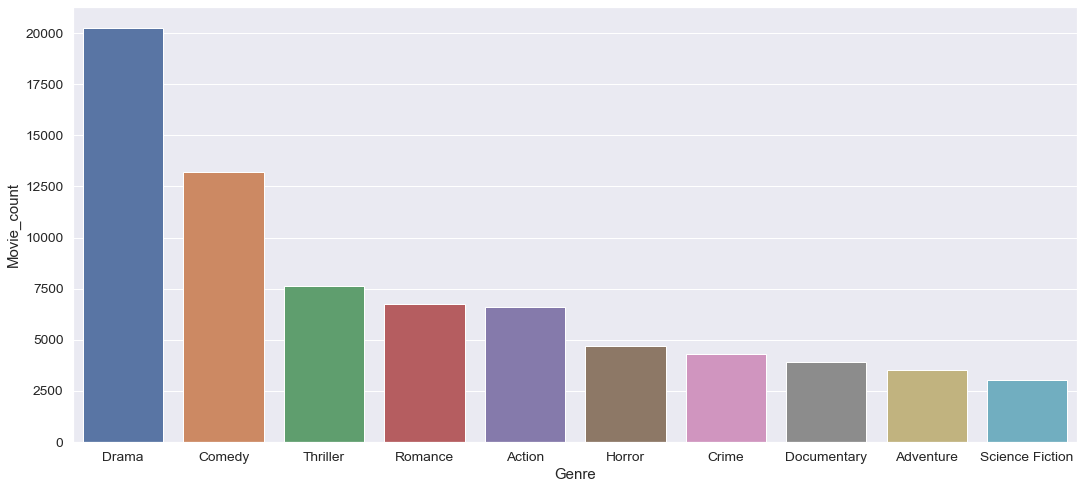

In [75]:
plt.figure(figsize=(18,8))
sns.barplot(x='Genre',y='Movie_count',data=gen.head(10))
plt.show()

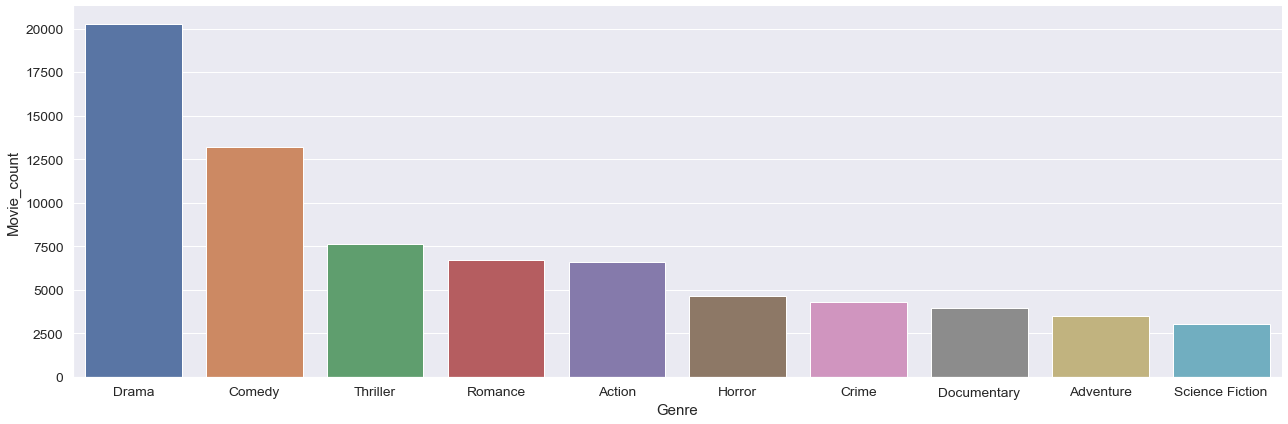

In [76]:
sns.catplot(x='Genre',y='Movie_count',data=gen.head(10),kind='bar',height=6,aspect=3)
plt.show()

The next question I want to answer is the trends in the share of genres of movies across the world. Has the demand for Science Fiction movies increased? Do certain years have a disproportionate share of Animation Movies?
Let's find out!

We will only be looking at trends starting 2000. We will consider only those themes that appear in the top 15 most popular 
genres. We will exclude Documentaries, Family and Foreign Movies from our analysis.

In [77]:
genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Adventure', 'Science Fiction', 'Mystery', 'Fantasy', 'Mystery', 'Animation']

In [78]:
gen_df.columns

Index(['belongs_to_collection', 'budget', 'homepage', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count',
       'release_year', 'day_of_week', 'month', 'return', 'genre'],
      dtype='object')

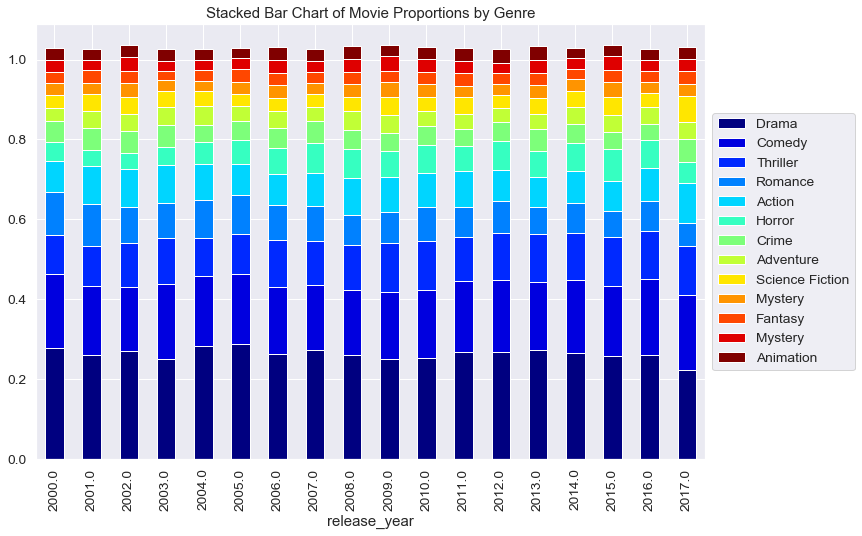

In [79]:
pop_gen_movies=gen_df[(gen_df['genre'].isin(genres))&(gen_df['release_year']>=2000)&(gen_df['release_year']<=2017)]
ctab=pd.crosstab([pop_gen_movies['release_year']],pop_gen_movies['genre']).apply(lambda x: x/x.sum(),axis=1)
ctab[genres].plot(kind='bar', stacked=True, colormap='jet', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Stacked Bar Chart of Movie Proportions by Genre")
plt.show()

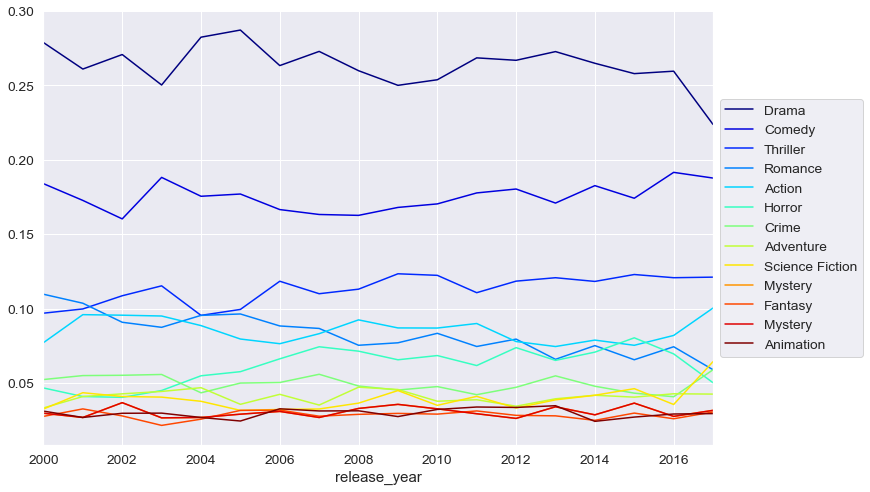

In [80]:
ctab[genres].plot(kind='line', stacked=False, colormap='jet', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The proportion of movies of each genre has remained fairly constant since the beginning of this century except for Drama. 
The proportion of drama films has fallen by over 5%. Thriller movies have enjoyed a slight increase in their share.

One question that I have always had is that if some genres are particularly more successful than others. For example, we should 
expect Science Fiction and Fantasy Movies to bring in more revenue than other genres but when normalized with their budget, do
they prove to be as successful? We will visualize two violin plots to answer this question. One will be genres versus the 
revenue while the other will be versus returns.

In [81]:
gen_df.columns

Index(['belongs_to_collection', 'budget', 'homepage', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count',
       'release_year', 'day_of_week', 'month', 'return', 'genre'],
      dtype='object')

In [82]:
genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Adventure', 'Science Fiction', 'Mystery', 'Fantasy', 'Mystery', 'Animation']

In [83]:
new_df=gen_df[gen_df['genre'].isin(genres)]

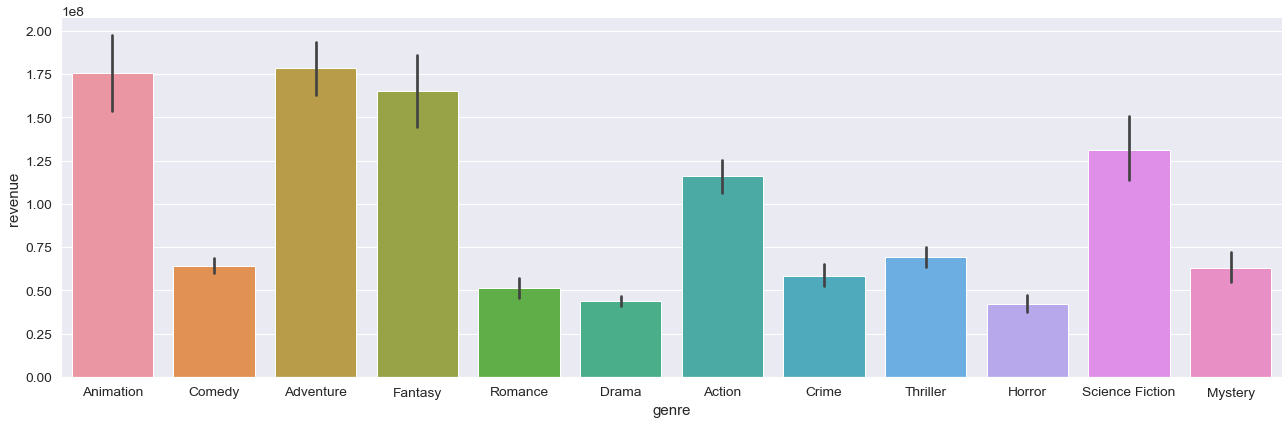

In [84]:
sns.catplot(y='revenue',x='genre',data=new_df,kind='bar',height=6,aspect=3)

From the data we can observe that Animation and Adventure genre movies has collected highest revenue. Let check now which 
genre had highest return.

In [85]:
new_df['return'].describe()

count    1.266300e+04
mean     5.654938e+03
std      2.272833e+05
min      5.217391e-07
25%      8.016000e-01
50%      2.022235e+00
75%      4.091636e+00
max      1.239638e+07
Name: return, dtype: float64

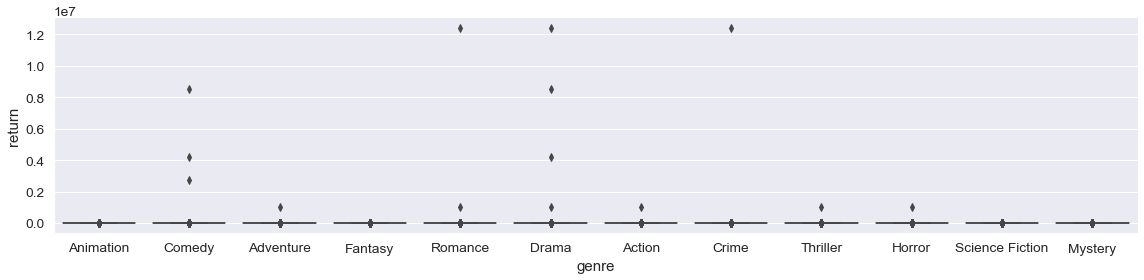

In [86]:
sns.catplot(y='return',x='genre',data=new_df,kind='box',height=4,aspect=4)
#ax.set_ylim([0, 3e8])

<Figure size 1296x576 with 0 Axes>

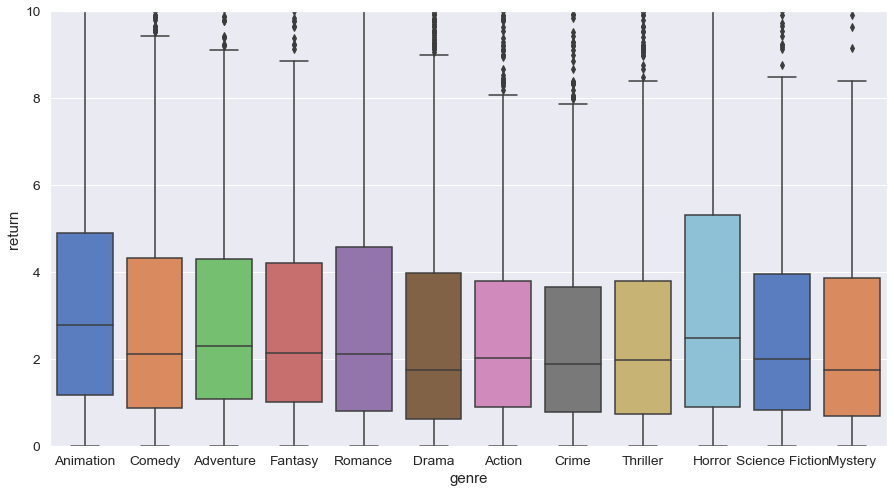

In [87]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='return', data=new_df, palette="muted", ax =ax)
ax.set_ylim([0, 10])
plt.show()

From the boxplot, it seems like Animation Movies tend to yield the highest returns on average. Horror Movies also tend to be 
a good bet. This is partially due to the nature of Horror movies being low budget compared to Fantasy Movies but being capable of generating very high revenues relative to its budget.

# homepage: The Official Homepage of the move.

In [88]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'release_year', 'day_of_week', 'month',
       'return'],
      dtype='object')

In [89]:
df['homepage'].notnull().sum()

7779

In [90]:
df[df['homepage'].notnull()][['homepage']]

,homepage
0,http://toystory.disney.com/toy-story
9,http://www.mgm.com/view/movie/757/Goldeneye/
24,http://www.mgm.com/title_title.do?title_star=L...
46,http://www.sevenmovie.com/
49,http://www.mgm.com/#/our-titles/2083/The-Usual...
...,...
45391,http://pixltv.com/cant-buy-my-love-premieres-s...
45392,http://pixltv.com/hopeless-romantic-premieres-...
45395,http://ddpromo.ru/
45398,http://lmtr.fi/


This are all links which will not be of much use, let's do one thing, Let's check if link is present then replace it with 1 else 0.

In [91]:
df['homepage']=df['homepage'].apply(lambda x : 0 if x == np.nan else 1)

# imdb_id: The IMDB ID of the movie.

In [92]:
df=df.drop(['imdb_id'],axis=1)

# original_title

In [93]:
df['original_title']

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
45461                        رگ خواب
45462            Siglo ng Pagluluwal
45463                       Betrayal
45464            Satana likuyushchiy
45465                       Queerama
Name: original_title, Length: 45463, dtype: object

The original title refers to the title of the movie in the native language in which the movie was shot. As such, I will prefer
using the translated, Anglicized name in this analysis and hence, will drop the original titles altogether. We will be able to
deduce if the movie is a foreign language film by looking at the original_language feature so no tangible information is lost in
doing so.

In [94]:
df[(df['original_title']!=df['title'])][['original_title','title']].head(10)

,original_title,title
28,La Cité des Enfants Perdus,The City of Lost Children
29,摇啊摇，摇到外婆桥,Shanghai Triad
32,"Guillaumet, les ailes du courage",Wings of Courage
57,Il postino,The Postman
58,Le confessionnal,The Confessional
67,Gazon maudit,French Twist
72,Les misérables,Les Miserables
79,بادکنک سفید,The White Balloon
81,Antonia,Antonia's Line
104,Keiner liebt mich,Nobody Loves Me


In [95]:
df=df.drop(['original_title'],axis=1)

# original_language: The language in which the movie was originally shot in.

In [96]:
df['original_language'].value_counts()

en    32269
fr     2438
it     1529
ja     1350
de     1080
      ...  
hy        1
zu        1
uz        1
sm        1
si        1
Name: original_language, Length: 89, dtype: int64

In [97]:
df['original_language'].nunique()

89

In [98]:
df['original_language'].drop_duplicates().shape[0]

90

In [99]:
lang_df=pd.DataFrame(df['original_language'].value_counts())
lang_df['language']=lang_df.index


In [100]:
lang_df.columns = ['number', 'language']
lang_df.head(10)

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de
es,994,es
ru,826,ru
hi,508,hi
ko,444,ko
zh,409,zh


There are over 90 languages represented in our dataset. As we had expected, English language films form the overwhelmingly
majority. French and Italian movies come at a very distant second and third respectively. Let us represent the most popular 
languages (apart from English) in the form of a bar plot.

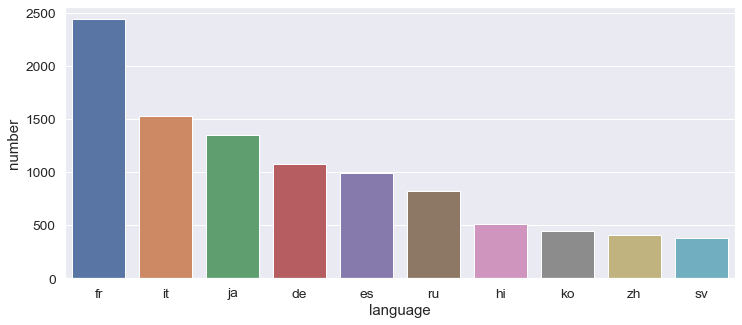

In [101]:
plt.figure(figsize=(12,5))
sns.barplot(x='language',y='number',data=lang_df.iloc[1:11])
plt.show()

As mentioned earlier, French and Italian are the most commonly occurring languages after English. Japanese and Hindi form the
majority as far as Asian Languages are concerned.

# Title ,Overview and Tagline

Are there certain words that figure more often in Movie Titles and Movie Blurbs? I suspect there are some words which are 
considered more potent and considered more worthy of a title. Let us find out!

In [102]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'release_year', 'day_of_week',
       'month', 'return'],
      dtype='object')

In [198]:
df['title']=df['title'].astype(str)
df['overview']=df['overview'].astype(str)
df['tagline']=df['tagline'].astype(str)

In [199]:
title_corpus=' '.join(df['title'])
overview_corpus=' '.join(df['overview'])
tagline_corpus=' '.join(df['tagline'])

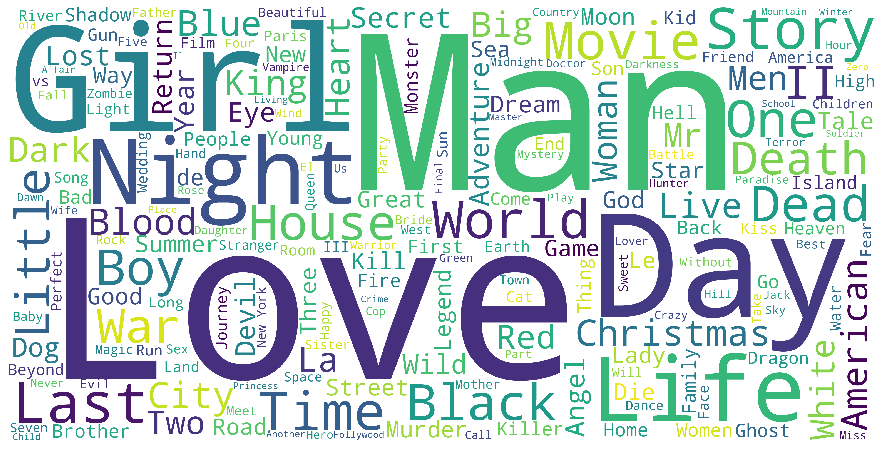

In [105]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()


The word Love is the most commonly used word in movie titles. Girl, Day and Man are also among the most commonly occuring words.
I think this encapsulates the idea of the ubiquitious presence of romance in movies pretty well.

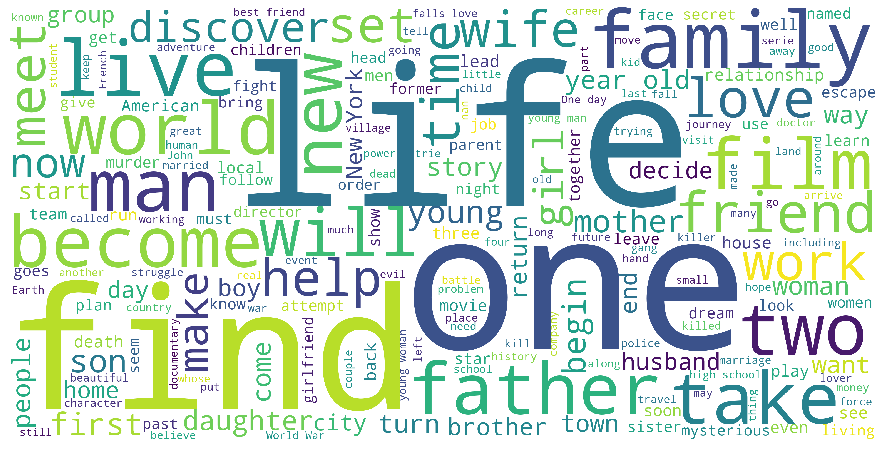

In [106]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

Life is the most commonly used word in Movie titles. One and Find are also popular in Movie Blurbs. Together with Love,
Man and Girl, these wordclouds give us a pretty good idea of the most popular themes present in movies.

In [ ]:
tagline_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(tagline_corpus)
plt.figure(figsize=(16,8))
plt.imshow(tagline_wordcloud)
plt.axis('off')
plt.show()

# Popularity, Vote Average and Vote Count

In this section, we will work with metrics provided to us by TMDB users. We will try to gain a deeper understanding of 
the popularity, vote average and vote count features and try and deduce any relationships between them as well as other numeric
features such as budget and revenue.

In [107]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'release_year', 'day_of_week',
       'month', 'return'],
      dtype='object')

In [108]:
df['popularity']=df['popularity'].astype(float)
df['vote_average']=df['vote_average'].astype(float)
df['vote_count']=df['vote_count'].astype(float)

In [109]:
df['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

In [110]:
df['popularity'].isnull().sum(),df['vote_average'].isnull().sum(),df['vote_count'].isnull().sum()

(3, 3, 3)

In [111]:
df[df['popularity'].isnull()][['popularity','vote_average','vote_count']]

,popularity,vote_average,vote_count
19729,NaN,NaN,NaN
29502,NaN,NaN,NaN
35586,NaN,NaN,NaN


In [112]:
#df['popularity']=df['popularity'].dropna()

In [113]:
df['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

Let's check the movie which are more popular has earned more revenue and more return or not.

In [114]:
df[(df['budget']>1e6)][['popularity','vote_average','vote_count','revenue','return','title']].sort_values(by='popularity',ascending=False).head(10)

,popularity,vote_average,vote_count,revenue,return,title
30700,547.488298,6.4,4729.0,1.156731e+09,15.631499,Minions
33356,294.337037,7.2,5025.0,8.205804e+08,5.507251,Wonder Woman
42222,287.253654,6.8,5530.0,1.262886e+09,7.893040,Beauty and the Beast
43644,228.032744,7.2,2083.0,2.245113e+08,6.603274,Baby Driver
24455,213.849907,7.8,6289.0,6.521054e+08,3.952154,Big Hero 6
26564,187.860492,7.4,11444.0,7.831130e+08,13.501948,Deadpool
26566,185.330992,7.6,4858.0,8.634161e+08,4.317081,Guardians of the Galaxy Vol. 2
14551,185.070892,7.2,12114.0,2.787965e+09,11.763566,Avatar
24351,183.870374,7.0,5499.0,8.876166e+07,4.438083,John Wick
23675,154.801009,7.9,6023.0,3.693304e+08,6.054596,Gone Girl


Thus we can see that high popularity does not mean high revenue as well as high vote_average. For Example Minions has highest 
popularity but that does not mean it is the favourate movie of viewers also.

We can see wonder Woman has high vote_average(7.2) than Minions (6.4).Same goes for return , Wonder woman has lower return than 
others right below in the popularity list.

Lets check the relation of vote_average with return, High vote_average should means high return/revenue

In [115]:
df[(df['budget']>1e6)&(df['vote_count']>100)][['popularity','vote_average','vote_count','revenue','return','title']].sort_values(by='vote_average',ascending=False).head(10)

,popularity,vote_average,vote_count,revenue,return,title
10309,34.457024,9.1,661.0,1.000000e+08,7.575758,Dilwale Dulhania Le Jayenge
834,41.109264,8.5,6024.0,2.450664e+08,40.844402,The Godfather
314,51.645403,8.5,8358.0,2.834147e+07,1.133659,The Shawshank Redemption
292,140.950236,8.3,8670.0,2.139288e+08,26.741095,Pulp Fiction
1178,36.629307,8.3,3418.0,4.754284e+07,3.657142,The Godfather: Part II
1184,32.182851,8.3,1104.0,NaN,NaN,Once Upon a Time in America
12481,123.167259,8.3,12269.0,1.004558e+09,5.430046,The Dark Knight
2843,63.869599,8.3,9678.0,1.008538e+08,1.600853,Fight Club
5481,41.048867,8.3,3968.0,2.749251e+08,18.328340,Spirited Away
522,41.725123,8.3,4436.0,3.213656e+08,14.607526,Schindler's List


This is strange but I am happy to see to that a hindi movie has highest vote_average of 9.1 which is maximum. But the vote_count 
is relatively lower as it is a bollywood movie with only Indian customer database.

Let check who has highest vote_count i:e means watched by most viewers.

In [116]:
df[(df['budget']>1e6)&(df['vote_count']>100)][['popularity','vote_average','vote_count','revenue','return','title']].sort_values(by='vote_count',ascending=False).head(10)

,popularity,vote_average,vote_count,revenue,return,title
15480,29.108149,8.1,14075.0,8.255328e+08,5.159580,Inception
12481,123.167259,8.3,12269.0,1.004558e+09,5.430046,The Dark Knight
14551,185.070892,7.2,12114.0,2.787965e+09,11.763566,Avatar
17818,89.887648,7.4,12000.0,1.519558e+09,6.907081,The Avengers
26564,187.860492,7.4,11444.0,7.831130e+08,13.501948,Deadpool
22879,32.213481,8.1,11187.0,6.751200e+08,4.091636,Interstellar
20051,19.785025,7.8,10297.0,4.253682e+08,4.253682,Django Unchained
23753,53.291601,7.9,10014.0,7.733286e+08,4.548992,Guardians of the Galaxy
2843,63.869599,8.3,9678.0,1.008538e+08,1.600853,Fight Club
18244,20.031667,6.9,9634.0,6.912107e+08,9.216143,The Hunger Games


Inception and The Dark Knight, two critically acclaimed and commercially successful Christopher Nolan movies figure at the top
of our chart.

In [117]:
df['popularity'].isnull().sum()

3

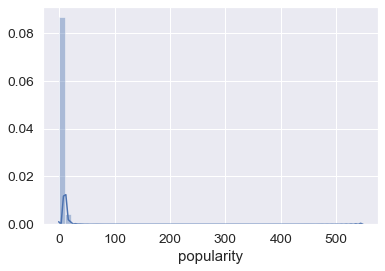

In [118]:
sns.distplot(df['popularity'].fillna(df['popularity'].median()))
plt.show()

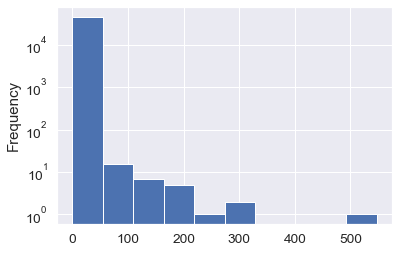

In [119]:
df['popularity'].plot(logy=True,kind='hist')

In [120]:
df['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

The Popularity score seems to be an extremely skewed quentity with a mean of only 2.9 but maximum values reaching as high as 547,
which is almost 1800% greater than the mean. However, as can be seen from the distribution plot, almost all movies have a popularity
score less than 10 (the 75th percentile is at 3.678902).

In [121]:
df['vote_average'].describe()

count    45460.000000
mean         5.618207
std          1.924216
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

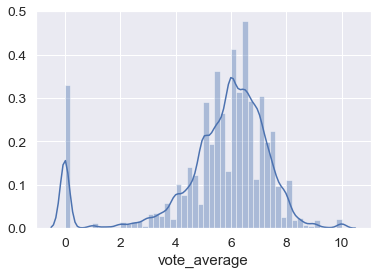

In [122]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

It appears that TMDB Users are extremely strict in their ratings. The mean rating is only a 5.6 on a scale of 10. 
Half the movies have a rating of less than or equal to 6. Let us check what the most critically acclaimed movies as per 
TMDB are. We will only consider those movies that have more than 2000 votes (similar to IMDB's criteria of 5000 votes in selecting its top 250).This time DDLJ will not be in our list.Sad!!

In [123]:
df[(df['budget']>1e6) &(df['vote_count']>2000)][['popularity','vote_average','vote_count','revenue','return','title']].sort_values(by='vote_average',ascending=False).head(10)

,popularity,vote_average,vote_count,revenue,return,title
834,41.109264,8.5,6024.0,2.450664e+08,40.844402,The Godfather
314,51.645403,8.5,8358.0,2.834147e+07,1.133659,The Shawshank Redemption
2211,39.394970,8.3,3643.0,2.294000e+08,11.470000,Life Is Beautiful
292,140.950236,8.3,8670.0,2.139288e+08,26.741095,Pulp Fiction
23673,64.299990,8.3,4376.0,1.309200e+07,3.967273,Whiplash
1152,35.529554,8.3,3001.0,1.089813e+08,36.327092,One Flew Over the Cuckoo's Nest
522,41.725123,8.3,4436.0,3.213656e+08,14.607526,Schindler's List
12481,123.167259,8.3,12269.0,1.004558e+09,5.430046,The Dark Knight
1178,36.629307,8.3,3418.0,4.754284e+07,3.657142,The Godfather: Part II
5481,41.048867,8.3,3968.0,2.749251e+08,18.328340,Spirited Away


The Shawshank Redemption and The Godfather are the two most critically acclaimed movies in the TMDB Database. 
Interestingly, they are the top 2 movies in IMDB's Top 250 Movies list too. They have a rating of over 9 on IMDB as
compared to their 8.5 TMDB Scores.

Do popularity and vote average share a tangible relationship? In other words, is there a strong positive correlation
between these two quanitties? Let us visualise their relationship in the form of a scatterplot.

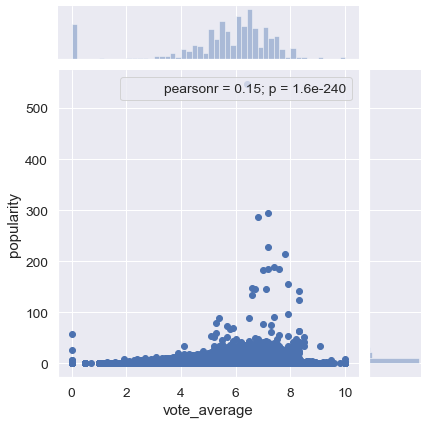

In [124]:
sns.jointplot(x='vote_average',y='popularity',data=df).annotate(stats.pearsonr)
plt.show()

Surprisingly, the Pearson Coefficient of the two aforementioned quantities is a measly 0.15 which suggests that there
is no tangible correlation. In other words, popularity and vote average and independent quantities. It would be interesting to discover
how TMDB assigns numerical popularity scores to its movies.

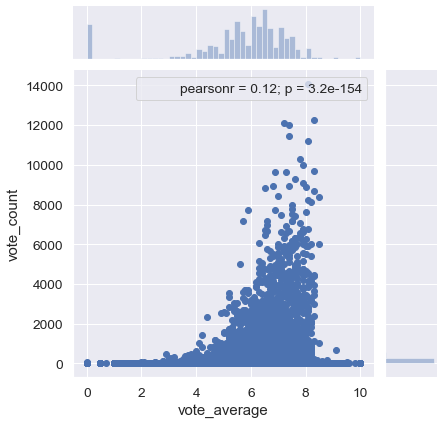

In [125]:
sns.jointplot(x='vote_average', y='vote_count', data=df).annotate(stats.pearsonr)

There is a very small correlation between Vote Count and Vote Average. A large number of votes on a particular movie does not necessarily imply that
the movie is good.

# poster_path: The URL of the poster image.

In [126]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'release_year', 'day_of_week',
       'month', 'return'],
      dtype='object')

In [127]:
df['poster_path'][0]

'/rhIRbceoE9lR4veEXuwCC2wARtG.jpg'

In [128]:
df=df.drop(['poster_path'],axis=1)

In [129]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'release_year', 'day_of_week', 'month',
       'return'],
      dtype='object')

# Production Companies

In [130]:
df['production_companies']

0           [{'name': 'Pixar Animation Studios', 'id': 3}]
1        [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2        [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3        [{'name': 'Twentieth Century Fox Film Corporat...
4        [{'name': 'Sandollar Productions', 'id': 5842}...
                               ...                        
45461                                                   []
45462               [{'name': 'Sine Olivia', 'id': 19653}]
45463    [{'name': 'American World Pictures', 'id': 6165}]
45464                 [{'name': 'Yermoliev', 'id': 88753}]
45465                                                   []
Name: production_companies, Length: 45463, dtype: object

In [131]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies']=df['production_companies'].apply(lambda x :[i['name'] for i in x] if isinstance (x,list) else [] )

In [132]:
df['production_companies']

0                                [Pixar Animation Studios]
1        [TriStar Pictures, Teitler Film, Interscope Co...
2                           [Warner Bros., Lancaster Gate]
3                 [Twentieth Century Fox Film Corporation]
4             [Sandollar Productions, Touchstone Pictures]
                               ...                        
45461                                                   []
45462                                        [Sine Olivia]
45463                            [American World Pictures]
45464                                          [Yermoliev]
45465                                                   []
Name: production_companies, Length: 45463, dtype: object

In [133]:
s=df.apply(lambda x:pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)

In [134]:
s.name = 'companies'

In [135]:
com_df = df.drop('production_companies', axis=1).join(s)

In [136]:
com_df[['companies']]

,companies
0,Pixar Animation Studios
1,TriStar Pictures
1,Teitler Film
1,Interscope Communications
2,Warner Bros.
...,...
45461,NaN
45462,Sine Olivia
45463,American World Pictures
45464,Yermoliev


In [137]:
com_df['companies'].value_counts()

Warner Bros.                              1250
Metro-Goldwyn-Mayer (MGM)                 1076
Paramount Pictures                        1003
Twentieth Century Fox Film Corporation     836
Universal Pictures                         830
                                          ... 
Film Columbus                                1
Georgia International Films                  1
Glace Bay Pictures                           1
FTG Media                                    1
Youngstreet                                  1
Name: companies, Length: 23537, dtype: int64

In [138]:
#company_name=com_df['companies'].value_counts().index
Com_count=pd.DataFrame(com_df['companies'].value_counts()).reset_index()
Com_count.columns=['Company_name','Count']

In [139]:
Com_count.head(10)

,Company_name,Count
0,Warner Bros.,1250
1,Metro-Goldwyn-Mayer (MGM),1076
2,Paramount Pictures,1003
3,Twentieth Century Fox Film Corporation,836
4,Universal Pictures,830
5,Columbia Pictures Corporation,448
6,Canal+,438
7,Columbia Pictures,431
8,RKO Radio Pictures,290
9,United Artists,279


Oh so there are 1250 movies from the production house of Warner Bros. Let see what few of those movies are along with their revenue and returns.

In [140]:
com_df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count',
       'release_year', 'day_of_week', 'month', 'return', 'companies'],
      dtype='object')

In [141]:
com_df[com_df['companies']=='Warner Bros.'][['companies','revenue','genres','return','title']]

,companies,revenue,genres,return,title
2,Warner Bros.,NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,Grumpier Old Men
5,Warner Bros.,187436818.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",3.123947,Heat
18,Warner Bros.,212385533.0,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",7.079518,Ace Ventura: When Nature Calls
22,Warner Bros.,30303072.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",0.606061,Assassins
37,Warner Bros.,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,It Takes Two
...,...,...,...,...,...
44678,Warner Bros.,519876949.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",5.198769,Dunkirk
44687,Warner Bros.,NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,Feed the Kitty
44689,Warner Bros.,NaN,"[{'id': 16, 'name': 'Animation'}]",NaN,Operation: Rabbit
44691,Warner Bros.,NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,Devil May Hare


Highest Earning Production Companies

Let us find out which production companies have earned the most money from the movie making business.

In [142]:
com_sum=pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns=['Total']
com_mean=pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns=['Average']
com_count=pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns=['Number']
com=pd.concat((com_sum,com_mean,com_count),axis=1)

In [143]:
com.sort_values('Total',ascending=False).head(10)

,Total,Average,Number
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78
Dune Entertainment,1.500379e+10,2.419966e+08,62


Warner Bros is the highest earning production company of all time earning a staggering 63.5 billion dollars from close to 500
movies. Universal Pictures and Paramaount Pictures are the second and the third highest earning companies with 55 billion 
dollars and 48 billion dollars in revenue respectively.

Most Succesful Production Companies

In [144]:
com[com['Number']>=15].sort_values('Average',ascending=False).head(10)

,Total,Average,Number
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19
Legendary Pictures,1.346866e+10,3.367166e+08,40


Pixar Animation Studios has produced the most successful movies, on average. This is not surprising considering the amazing 
array of movies that it has produced in the last few decades: Up, Finding Nemo, Inside Out, Wall-E, Ratatouille, the Toy Story
Franchise, Cars Franchise, etc. Marvel Studios with an average gross of 615 million dollars comes in second with movies such as
Iron Man and The Avengers under its banner.

# Production Countries

The Full MovieLens Dataset consists of movies that are overwhelmingly in the English language (more than 31000). However, these movies may have shot in various locations around the world. It would be interesting to see which countries serve as the most popular destinations for shooting movies by filmmakers, especially those in the United States of America and the United Kingdom

In [145]:
df['production_countries']

0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
45461               [{'iso_3166_1': 'IR', 'name': 'Iran'}]
45462        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
45463    [{'iso_3166_1': 'US', 'name': 'United States o...
45464             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
45465     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, Length: 45463, dtype: object

In [146]:
df['production_countries']=df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries']=df['production_countries'].apply(lambda x :[i['name'] for i in x]if isinstance (x,list) else [])
df['production_countries']

0        [United States of America]
1        [United States of America]
2        [United States of America]
3        [United States of America]
4        [United States of America]
                    ...            
45461                        [Iran]
45462                 [Philippines]
45463    [United States of America]
45464                      [Russia]
45465              [United Kingdom]
Name: production_countries, Length: 45463, dtype: object

In [147]:
s=df.apply(lambda x:pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1,drop=True)

In [148]:
s.name='countries'

In [149]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'release_year', 'day_of_week', 'month',
       'return'],
      dtype='object')

In [150]:
df_con=df.drop('production_countries',axis=1).join(s)

In [151]:
df_con.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count',
       'release_year', 'day_of_week', 'month', 'return', 'countries'],
      dtype='object')

In [152]:
df_con['countries'].value_counts()

United States of America                21153
United Kingdom                           4094
France                                   3940
Germany                                  2254
Italy                                    2169
                                        ...  
Madagascar                                  1
Honduras                                    1
Barbados                                    1
Myanmar                                     1
United States Minor Outlying Islands        1
Name: countries, Length: 160, dtype: int64

In [153]:
con_df=pd.DataFrame(df_con['countries'].value_counts())
con_df['country']=con_df.index
con_df.columns=['num_movies','country']
con_df.reset_index().drop('index',axis=1)
con_df.head(10)

,num_movies,country
United States of America,21153,United States of America
United Kingdom,4094,United Kingdom
France,3940,France
Germany,2254,Germany
Italy,2169,Italy
Canada,1765,Canada
Japan,1648,Japan
Spain,964,Spain
Russia,912,Russia
India,828,India


In [154]:
con_df = con_df[con_df['country'] != 'United States of America']

In [155]:
data = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_movies'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
      ) ]

layout = dict(
    title = 'Production Countries for the MovieLens Movies (Apart from US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

Unsurprisingly, the United States is the most popular destination of production for movies given that our dataset largely
consists of English movies. Europe is also an extremely popular location with the UK, France, Germany and Italy in the top 5. 
Japan and India are the most popular Asian countries when it comes to movie production.

# Runtime

From its humble beginnings of 1 minute slient, black & white clips to epic 3 hour visual delights, movies have a come a long way in terms of runtime. In this section, let us try and gain some additional insights about the nature of movie lengths and their evolution over time.

In [156]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'release_year', 'day_of_week', 'month',
       'return'],
      dtype='object')

In [157]:
df['runtime'].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

The average length of a movie is about 1 hour and 30 minutes. The longest movie on record in this dataset is a staggering 1256 minutes (or 20 hours) long.

In [158]:
df['runtime']=df['runtime'].astype(float)


We are aware that most movies are less than 5 hours (or 300 minutes) long. Let us plot a distribution of these mainstream movies.

In [159]:
#plt.figure(figsize=(12,6))
#sns.distplot(df[(df['runtime']>0) &(df['runtime']<300)])['runtime']

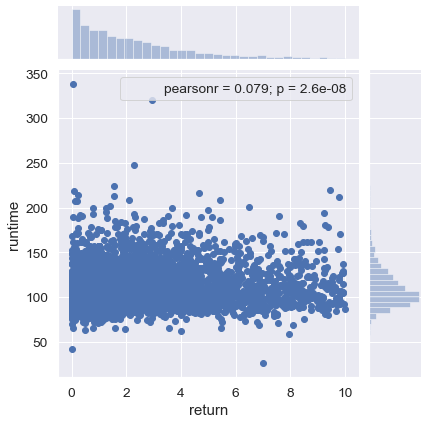

In [170]:
df_run=df[(df['runtime']>0)&(df['return']<10)]
sns.jointplot(y='runtime',x='return',data=df_run).annotate(stats.pearsonr)
plt.show()

There seems to be relationship between the two quantities. The duration of a movie is independent of its success. However, I have a feeling this might not be the case with duration and budget. A longer movie should entail a higher budget. Let us find out if this is really the case.

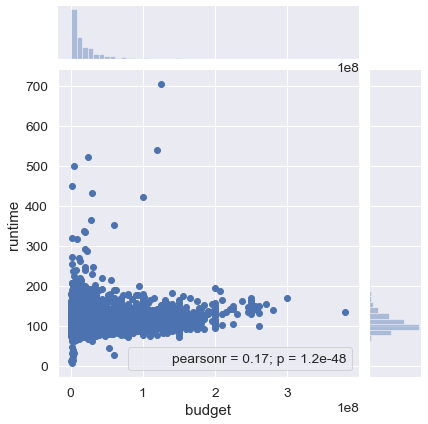

In [173]:
df_run1=df[(df['runtime']>0)&(df['budget']>1e6)]
sns.jointplot(y='runtime',x='budget',data=df_run1).annotate(stats.pearsonr)

The two quantities have a much weaker correlation than I had expected. In retrospect, the genre of the movie tends to have a much greater impact on budget. A 3 hour art film will cost significantly lesser than a 90 minute Sci-Fi movie.

Next, I'd like to see the average lengths of movies through time, right from the 1890s to the 2017s. It would be interesting to see the trends in what filmmakers adjudged would be the appropriate length of a movie at that time.

In [176]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'release_year', 'day_of_week', 'month',
       'return'],
      dtype='object')

In [178]:
df_time=df[(df['release_year']!='NaT')].groupby('release_year')['runtime'].mean()

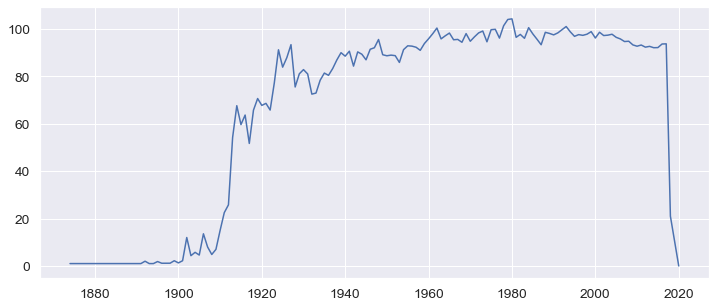

In [183]:
plt.figure(figsize=(12,5))
plt.plot(df_time.index,df_time)
plt.show()

We notice that films started hitting the 60 minute mark as early as 1914. Starting 1924, films started having the traiditonal 90 minute duration and has remained more or less constant ever since.

Finally in this section, let us see the longest and the shortest movies of all time (with respect to the movies in the dataset).

In [191]:
df[(df['runtime']>0)&(df['budget'].notnull())&(df['return'].notnull())][['runtime','budget','revenue','title','release_year']].sort_values(by='runtime',ascending=False)

,runtime,budget,revenue,title,release_year
16123,338.0,18000000.0,871279.0,Carlos,2010.0
19637,320.0,1400000.0,4100000.0,Gangs of Wasseypur,2012.0
4146,248.0,31115000.0,71000000.0,Cleopatra,1963.0
893,238.0,4000000.0,400176459.0,Gone with the Wind,1939.0
7467,225.0,600000.0,34505110.0,Woodstock,1970.0
...,...,...,...,...,...
18533,62.0,250000.0,1000000.0,Louis C.K.: Live at the Beacon Theater,2011.0
8293,59.0,17311.0,137365.0,The Cheat,1915.0
39628,57.0,75000.0,1200000.0,Lights of New York,1928.0
13480,42.0,200000.0,3.0,Dr. Horrible's Sing-Along Blog,2008.0


Thus Carlos is the longest running show. It is a Tv series that is the reason why it ran for 5 hour 38  minutes

In [195]:
df[(df['runtime']>0)][['runtime','title','release_year']].sort_values(by='runtime',ascending=True).head(10)

,runtime,title,release_year
35146,1.0,La Vague,1891.0
36577,1.0,Champs de Mars,1900.0
36576,1.0,Palace of Electricity,1900.0
44965,1.0,"Luis Martinetti, Contortionist",1894.0
42357,1.0,A Gathering of Cats,2007.0
36575,1.0,Eiffel Tower from Trocadero Palace,1900.0
36574,1.0,Panorama of Eiffel Tower,1900.0
44714,1.0,The Infernal Caldron,1903.0
19244,1.0,The Kiss,1896.0
44646,1.0,The Vanishing Lady,1896.0


We see that every movie in this list except A Gathering of Cats were filmed in the late 1890s and the beginning of the 20th century. All these movies were one minute long.

# Movie Status

Although not entirely relevant to our analysis of movies, gathering information on the various kinds of movies based on their status of release can provide us interesitng insight on the nature of the movies present in our dataset. My preliminary hunch was that almost every movie has the Released status. Let's find out.

In [197]:
df['status'].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

Almost every movie is indeed released. However, it is interesting to see that MovieLens has user ratings for movies that are
still in the planning, production and post production stage. We might take this information into account while building our collaborative filtering recommendation engine.

In [203]:
df[df['overview']!=df['tagline']]['tagline'].shape

(44480,)